# Import Libraries and Dataset

In [2]:
#install dash
# !pip3 install dash

#installing sklearn
#!pip3 install scikit-learn

In [3]:
# Numpy
import numpy as np

# For data analysis
import pandas as pd

# For model creation and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# For visualizations and interactive dashboard creation

# from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output

import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

winequality_df = pd.read_csv('https://raw.githubusercontent.com/thusharabandara/co544-2023-lab3-interactive-python-dashboards/master/data/winequality-red.csv', sep=',') #Read the dataset
#winequality_df = pd.read_csv('./winequality-red.csv', sep=',') #Read the dataset
print(winequality_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Exploratory Data Analysis (EDA) and Data Preprocessing

## Handling missing values and duplicates

In [4]:
# check for missing values
print(winequality_df.isnull().sum())

# drop rows with missing values
winequality_df.dropna(inplace=True)

# Drop duplicate rows
winequality_df.drop_duplicates(keep='first')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## EDA

### Analysing the Distribution of Wine Quality Scores

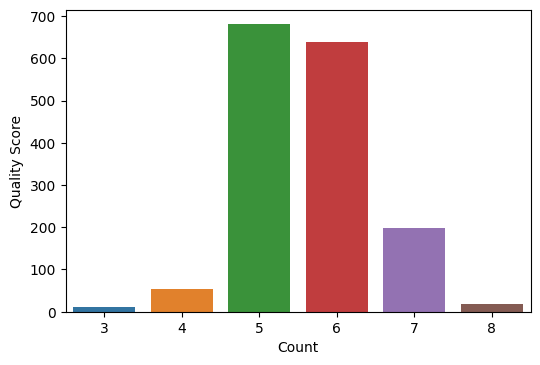

In [5]:
# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=winequality_df, x="quality")
plt.xlabel("Count")
plt.ylabel("Quality Score")
plt.show()

### Preparing the Dataset for Binary Classification

In [6]:
# Label quality into Good (1) and Bad (0)
winequality_df['quality'] = winequality_df['quality'].apply(lambda x: 1 if x >= 6.0 else 0)

### Gaining Insights from the Correlation Matrix

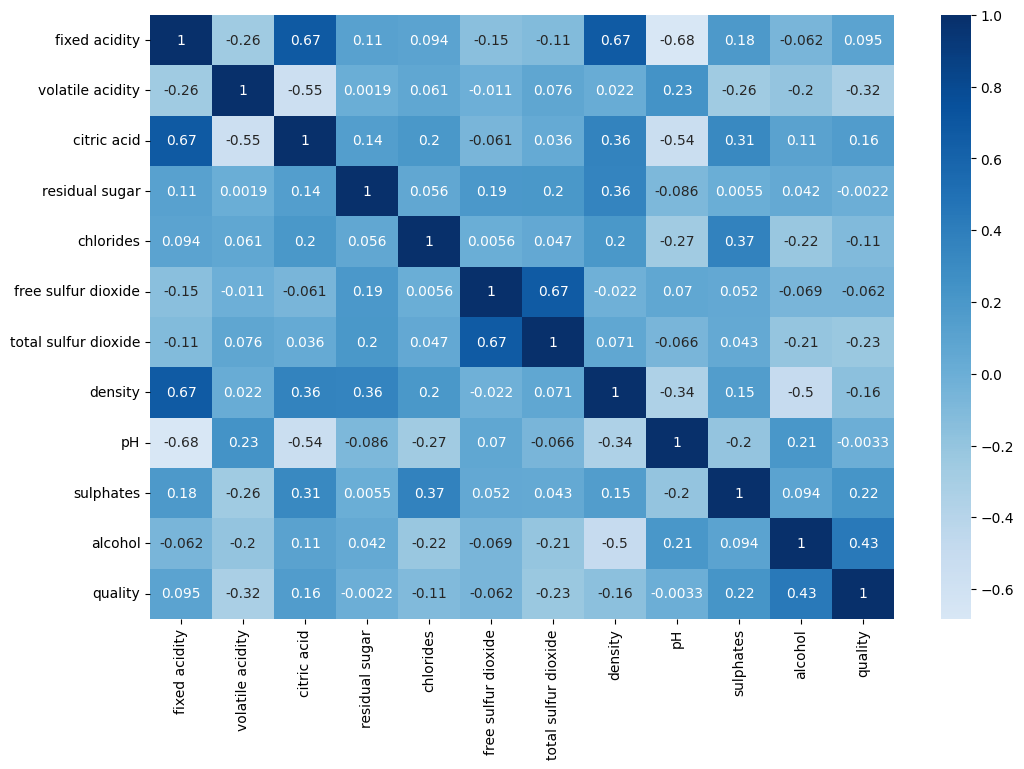

In [7]:
# Calculate the correlation matrix
corr_matrix = winequality_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues', annot=True)
plt.show()

### Preparing the dataset for model training

In [8]:
# Drop the target variable
X = winequality_df.drop('quality', axis=1)
# Set the target variable as the label
y = winequality_df['quality']

In [9]:
# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# TODO 1

#### Discuss how Figure 2 can be used to gain insights into the features that most influence the wine quality and to identify highly correlated features.

Features that most influence the wine quality are the highly correlated features with quality
They are,
1. Alcohol - 0.43
2. volatile acidity - 0.321441

In [10]:
corr = abs(winequality_df.corr()['quality']).sort_values(ascending=False)
print(corr)

quality                 1.000000
alcohol                 0.434751
volatile acidity        0.321441
total sulfur dioxide    0.231963
sulphates               0.218072
citric acid             0.159129
density                 0.159110
chlorides               0.109494
fixed acidity           0.095093
free sulfur dioxide     0.061757
pH                      0.003264
residual sugar          0.002160
Name: quality, dtype: float64


# 5. Applying Logistic Regression

In [11]:
# Create an object of the logistic regression model
logreg_model = LogisticRegression()

In [12]:
# Fit the model to the training data
logreg_model.fit(X_train, y_train)

/Users/haritha/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [13]:
# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

# 6. Evaluating Model Performance

In [14]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[104  37]
 [ 44 135]]


Accuracy

In [15]:
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.746875


Precision

In [16]:
# Compute the precision of the model
precision = precision_score(y_test, y_pred)
print(precision)

0.7848837209302325


Recall

In [17]:
# Compute the recall of the model
recall = recall_score(y_test, y_pred)
print(recall)

0.7541899441340782


F1 Score

In [18]:
# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)
print(f1)

0.7692307692307692


## The Receiver Operating Characteristic (ROC) Curve and the Area Under the Curve (AUC)

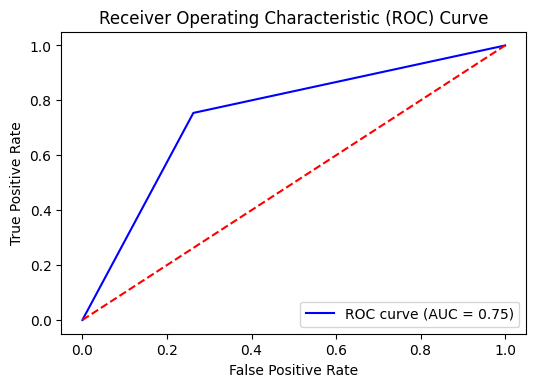

In [19]:
#y_true and y_score are the true labels and predicted scores, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.figure(dpi=100)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# TODO 2

<b>What is the most appropriate performance metric to evaluate the model’s performance? Briefly explain why.</b>

In the case of wine quality classification, we should aim for high precision and recall, as we want to correctly classify as many good wines as possible without misclassifying too many bad wines as good. Hence to obtain the optimum value between precision and recall, we should have to consider f1 score.

<BarContainer object of 2 artists>

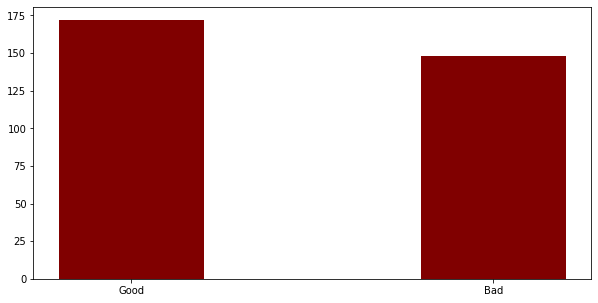

In [20]:
# print(y_pred)
ones = sum(y_pred)
zeros = len(y_pred) - ones

distribution = {"Good":ones,"Bad":zeros}

Key = list(distribution.keys())
val = list(distribution.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Key, val, color ='maroon',
        width = 0.4)

# TODO 3

<b>Eliminate irrelevant features that may negatively affect the performance of the model and discuss how that may affect the model’s performance using your chosen metric.</b>

In [21]:
test_df = winequality_df.copy()
test_df.drop(columns=['residual sugar','pH'],axis='columns',inplace=True)
print('----------')
print(test_df)

----------
      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                    11.0                  34.0  0.99780       0.56      9.4   
1                    25.0                  67.0 

In [22]:
# Drop the target variable
X1 = test_df.drop('quality', axis=1)
# Set the target variable as the label
y1 = test_df['quality']

In [23]:
# Split the data into training and testing sets (20% testing and 80% training)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [24]:
# Create an object of the logistic regression model
logreg_model = LogisticRegression()

In [25]:
# Fit the model to the training data
logreg_model.fit(X_train1, y_train1)

/Users/haritha/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [26]:
# Predict the labels of the test set
y_pred1 = logreg_model.predict(X_test1)

In [27]:
# Create the confusion matrix
confusion_mat1 = confusion_matrix(y_test1, y_pred1)
print(confusion_mat1)

[[107  34]
 [ 49 130]]


In [28]:
# Compute the F1 score of the model
f1_test = f1_score(y_test1, y_pred1)
print(f1_test)

0.7580174927113703


# TODO 4

<b>Try different test/train split ratios and evaluate the model performance in terms of your chosen metric to find the optimal split ratio.</b>

In [29]:
def optimumSplit(test_split):

    todo4_df = winequality_df.copy()

    # Drop the target variable
    X2 = todo4_df.drop('quality', axis=1)
    # Set the target variable as the label
    y2 = todo4_df['quality']

    # Split the data into training and testing sets (20% testing and 80% training)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=test_split, random_state=42)

    # Create an object of the logistic regression model
    logreg_model = LogisticRegression()

    # Fit the model to the training data
    logreg_model.fit(X2_train, y2_train)

    # Predict the labels of the test set
    y2_pred = logreg_model.predict(X2_test)
    
    # Create the confusion matrix
    confusion_mat2 = confusion_matrix(y2_test, y2_pred)
    
    # Compute the F1 score of the model
    f1_split = f1_score(y2_test, y2_pred)
    
    return f1_split

In [30]:
import warnings
warnings.filterwarnings('ignore')

# Test
maxf1 = 0
mintestsplit = 100
for i in range(1,50,1):
    test_split = i*0.01
    
    f1_value = optimumSplit(test_split)
    print("Test Data =",test_split*100,"%"," and ","Train Data =",(1-test_split)*100,"%","f1 value =",f1_value)
    if(f1_value > maxf1):
        maxf1 = f1_value
        mintestsplit = test_split
    print("------------------------------------------------------------------------------")

print("test split =",mintestsplit*100,"%", "maximum f1 value =",maxf1)


Test Data = 1.0 %  and  Train Data = 99.0 % f1 value = 0.7142857142857143
------------------------------------------------------------------------------
Test Data = 2.0 %  and  Train Data = 98.0 % f1 value = 0.6000000000000001
------------------------------------------------------------------------------
Test Data = 3.0 %  and  Train Data = 97.0 % f1 value = 0.6382978723404256
------------------------------------------------------------------------------
Test Data = 4.0 %  and  Train Data = 96.0 % f1 value = 0.6229508196721313
------------------------------------------------------------------------------
Test Data = 5.0 %  and  Train Data = 95.0 % f1 value = 0.7073170731707317
------------------------------------------------------------------------------
Test Data = 6.0 %  and  Train Data = 94.0 % f1 value = 0.7326732673267328
------------------------------------------------------------------------------
Test Data = 7.000000000000001 %  and  Train Data = 93.0 % f1 value = 0.77966101694

Optimum Split Ratio: Test => 9% and Train => 81%

# TODO 5

#### Perform hyperparameter tuning for the logistic regression model using grid search to optimize the model’s performance with the dataset. Try different hyperparameters, such as C (regularization strength), penalty (regularization type), solver (optimization algorithm), and max iter (maximum number of iterations to converge). Compare the results with our initial model and choose the best set of hyperparameters.

In [34]:
#Before
#Precision = 0.7848837209302325
#Accuracy = 0.746875
#Recall = 0.7541899441340782
#f1 score = 0.7692307692307692

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

todo_5_model = LogisticRegression()

hyperparameters = {
    'C':[0.1,0.9,1,2,3,4,5,6,10],
    'penalty':['l1','l2'],
    'solver':['newton-cg','lbfgs','liblinear'],
    'max_iter':[100,500,1000]
}

clf = GridSearchCV(todo_5_model,
                  param_grid = hyperparameters,
                  scoring = 'f1',
                   cv=10)

clf.fit(X_train,y_train)

best_params = clf.best_params_

best_logreg_model = LogisticRegression(**best_params)
best_logreg_model.fit(X_train,y_train)

precision = precision_score(y_test,best_logreg_model.predict(X_test))
accuracy = accuracy_score(y_test,best_logreg_model.predict(X_test))
recall = recall_score(y_test,best_logreg_model.predict(X_test))
f1 = f1_score(y_test,best_logreg_model.predict(X_test))

print("Precision =",precision)
print("Accuracy =",accuracy)
print("Recall =",recall)
print("F1 Score =",f1)

Precision = 0.7857142857142857
Accuracy = 0.740625
Recall = 0.7374301675977654
F1 Score = 0.760806916426513


# 7. Creating an Interactive Dashboard

## Creating the Layout

In [42]:
# Create the Dash app
app = dash.Dash(__name__)
# Define the layout of the dashboard
app.layout = html.Div(
    children=[
    html.H1('CO544-2023 Lab 3: Wine Quality Prediction'),
    # Layout for exploratory data analysis: correlation between two selected features
    html.Div([
        html.H3('Wine Quality Tester'),
        html.Label('Feature 1 (X-axis)'),
        dcc.Dropdown(
            id='x_feature',
            options=[{'label': col, 'value': col} for col in winequality_df.columns],
            value=winequality_df.columns[0]
        )
    ], style={'width': '30%', 'display': 'inline-block'}),
    html.Div([
        html.Label('Feature 2 (Y-axis)'),
        dcc.Dropdown(
            id='y_feature',
            options=[{'label': col, 'value': col} for col in winequality_df.columns],
            value=winequality_df.columns[1]
        )
    ], style={'width': '30%', 'display': 'inline-block'}),
    dcc.Graph(id='correlation_plot'),
    # Layout for wine quality prediction based on input feature values
    html.H3("Wine Quality Prediction"),
    html.Div([
        html.P('To predict the wine quality as "GOOD" or "BAD" please fill the following fields and press predict Button')
    ]),
    html.Div([
        html.Label("Fixed Acidity"),
        dcc.Input(id='fixed_acidity', type='number', required=True),
        html.Br(),
        html.Label("Volatile Acidity"),
        dcc.Input(id='volatile_acidity', type='number', required=True),
        html.Br(),
        html.Label("Citric Acid"),
        dcc.Input(id='citric_acid', type='number', required=True),
        html.Br(),
        html.Label("Residual Sugar"),
        dcc.Input(id='residual_sugar', type='number', required=True),
        html.Br(),
        html.Label("Chlorides"),
        dcc.Input(id='chlorides', type='number', required=True),
        html.Br(),
        html.Label("Free Sulfur Dioxide"),
        dcc.Input(id='free_sulfur_dioxide', type='number', required=True),
        html.Br(),
        html.Label("Total Sulfur Dioxide"),
        dcc.Input(id='total_sulfur_dioxide', type='number', required=True),
        html.Br(),
        html.Label("Density"),
        dcc.Input(id='density', type='number', required=True),
        html.Br(),
        html.Label("pH"),
        dcc.Input(id='ph', type='number', required=True),
        html.Br(),
        html.Label("Sulphates"),
        dcc.Input(id='sulphates', type='number', required=True),
        html.Br(),
        html.Label("Alcohol"),
        dcc.Input(id='alcohol', type='number', required=True),
        html.Br(),
]),
    html.Div([
        html.Br(),
        html.Button('Predict', id='predict-button', n_clicks=0),
]),
    html.Div([
        html.H4("Predicted Quality"),
        html.Div(id='prediction-output')
]) ])

## Adding Interactivity

In [43]:
# Define the callback to update the correlation plot
@app.callback(
    dash.dependencies.Output('correlation_plot', 'figure'),
    [dash.dependencies.Input('x_feature', 'value'),
     dash.dependencies.Input('y_feature', 'value')]
)
def update_correlation_plot(x_feature, y_feature):
    fig = px.scatter(winequality_df, x=x_feature, y=y_feature, color='quality')
    fig.update_layout(title=f"Correlation between {x_feature} and {y_feature}")
    return fig
# Define the callback function to predict wine quality
@app.callback(
    Output(component_id='prediction-output', component_property='children'),
    [Input('predict-button', 'n_clicks')],
    [State('fixed_acidity', 'value'),
     State('volatile_acidity', 'value'),
     State('citric_acid', 'value'),
     State('residual_sugar', 'value'),
     State('chlorides', 'value'),
     State('free_sulfur_dioxide', 'value'),
     State('total_sulfur_dioxide', 'value'),
     State('density', 'value'),
     State('ph', 'value'),
     State('sulphates', 'value'),
     State('alcohol', 'value')]
)
def predict_quality(n_clicks, fixed_acidity, volatile_acidity, citric_acid,
        residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide,
        density, ph, sulphates, alcohol):
    # Create input features array for prediction
    input_features = np.array([fixed_acidity, volatile_acidity, citric_acid,
            residual_sugar, chlorides, free_sulfur_dioxide,
            total_sulfur_dioxide, density, ph, sulphates, alcohol]).reshape(1, -1)
    # Predict the wine quality (0 = bad, 1 = good)
    prediction = logreg_model.predict(input_features)[0]
    # Return the prediction
    if prediction == 1:
        return 'This wine is predicted to be good quality.'
    else:
        return 'This wine is predicted to be bad quality.'


## Running the Dashboard

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [24/May/2023 17:03:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2023 17:03:35] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [24/May/2023 17:03:35] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [24/May/2023 17:03:35] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [24/May/2023 17:03:36] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2023 17:03:36] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2023 17:03:36] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [24/May/2023 17:03:36] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [24/May/2023 17:03:36] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
[2023-05-24 17:03:36,708] ERROR in app: Exception on /_dash-update-component [POST]
T

# TODO 6

#### Deploy the dashboard on a cloud platform to make it accessible to a wider audience.